# DSC1022STR - Deep Learning
## DSC1022STR_Actividad 1_Deep Learning_Deep Vision

Alumnos Franco Harte y Eduaro Capel (Grupo 9)

In the following project two approches are going to be used. The dataset used is from the Pytorch library cifrar100 where we got 60000 obvservations, 50000 belong to the train split and 10000 to the test set. In the frist approch, We are going to use a pre-trained neuronal network called ResNet50 where we'll classify the different photos into 100 classes. In the second one, we'll test different arquitectures looking for the highest accuracy.

In [ ]:
# Import the necessary packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tarfile
import pickle
import random
%matplotlib inline

from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report
from google.colab import drive

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications import resnet
from tensorflow.keras.callbacks import EarlyStopping

## Inspeccionando el conjunto de datos


In [ ]:
# Carga de datos
print("[INFO]: Loading CIFAR-100 data...")
((x_train, y_train), (x_test, y_test)) = cifar100.load_data()

# CIFAR100 labelnames
labelNames = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']


len(x_train.shape)



[INFO]: Loading CIFAR-100 data...
169001437/169001437 [==============================] - 4s 0us/step


4

In [ ]:
print(y_train)

[[19]
 [29]
 [ 0]
 ...
 [ 3]
 [ 7]
 [73]]


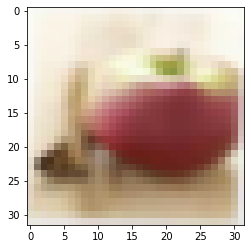

La clase es apple


In [ ]:
#print(x_train)
#print(len(y_train))

#PREPROCESAMIENTO DE DATOS

x_train= x_train.astype('float')/255
x_test =x_test.astype('float')/255

# show image
i = 2
imgplot = plt.imshow(x_train[i])
plt.show()
print("La clase es %s" %(labelNames[y_train[i][0]]))

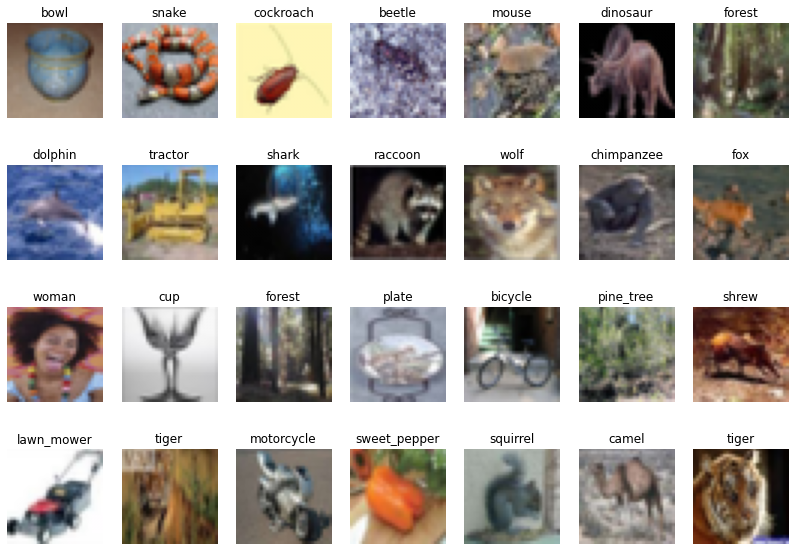

In [ ]:
fig = plt.figure(figsize=(14,10))

for n, i in enumerate(random.sample(range(1,len(y_train)), 28)):
    fig.add_subplot(4, 7, n+1)
    img = x_train[i]
    plt.imshow(img)
    plt.title(labelNames[y_train[i][0]])
    plt.axis('off')

[Text(0.5, 1.0, 'Número de muestras por clase'),
 Text(0, 0.5, 'Número de muestras')]

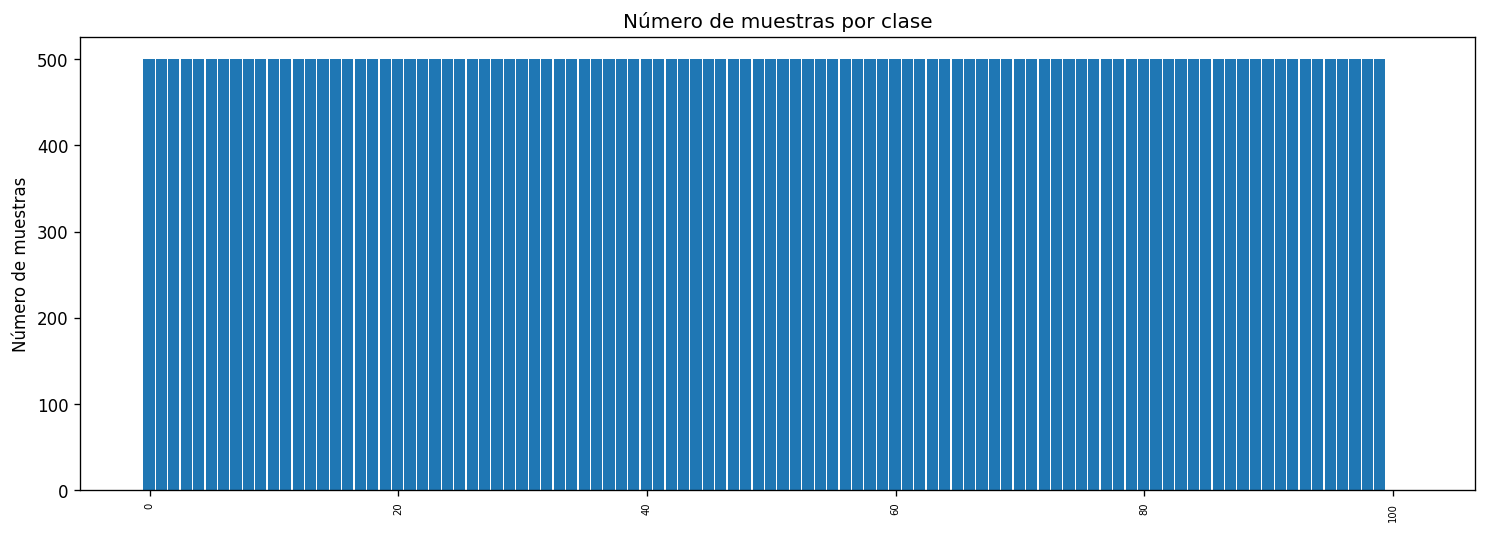

In [ ]:
plt.rcParams.update({'figure.figsize':(15,5), 'figure.dpi':120})

# Plot Histogram on x
plt.hist(y_train, bins=range(0,103), width=0.9, align='left')
plt.xticks(rotation = 90, size=6)
plt.gca().set(title='Número de muestras por clase', ylabel='Número de muestras')

Esta grafica nos muestra la distribucion de clases que como viene descrito en el dataset: has 100 classes containing 600 images each. There are **500 training images** and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses.


#Strategy 1- Red pre entrenada

In [ ]:
# Carga de datos
print("[INFO]: Loading CIFAR-100 data...")
((x_train, y_train), (x_test, y_test)) = cifar100.load_data()

# CIFAR100 labelnames

LabelNames = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']


print(x_train.max())
print(y_train.max())

#Etiquetas a One hot encoding

#lb = LabelBinarizer()
#y_train = lb.fit_transform(y_train)
#y_test = lb.transform(y_test)





[INFO]: Loading CIFAR-100 data...
255
99


In [ ]:
# PREPROCESADO DE DATOS
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)


x_train = resnet.preprocess_input(x_train)
x_test = resnet.preprocess_input(x_test)

print(x_train.shape)
print(x_test.shape)

print(x_train.max())
print(y_train.max())


(50000, 32, 32, 3)
(10000, 32, 32, 3)
151.061
1


In [ ]:
#Base model

base_model = ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape= (32, 32, 3)
)

base_model.summary()

94765736/94765736 [==============================] - 4s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                          

In [ ]:
print(x_train[0])
print(y_train[0])

[[[ 151.061      138.22101    131.32     ]
  [ 151.061      138.22101    131.32     ]
  [ 151.061      138.22101    131.32     ]
  ...
  [  89.061       88.221       71.32     ]
  [ 100.061      107.221       88.32     ]
  [  63.060997    77.221       58.32     ]]

 [[ 151.061      138.22101    131.32     ]
  [ 150.061      137.22101    130.32     ]
  [ 150.061      137.22101    130.32     ]
  ...
  [  46.060997    59.221       46.32     ]
  [  26.060997    51.221       37.32     ]
  [   9.060997    37.221       22.32     ]]

 [[ 151.061      138.22101    131.32     ]
  [ 150.061      137.22101    130.32     ]
  [ 151.061      138.22101    131.32     ]
  ...
  [  65.061       82.221       65.32     ]
  [  26.060997    61.221       42.32     ]
  [ -16.939003    16.221       -2.6800003]]

 ...

 [[ -24.939003    68.221       24.32     ]
  [ -46.939003    65.221       18.32     ]
  [ -43.939003    62.221       16.32     ]
  ...
  [-102.939      -99.779      -93.68     ]
  [ -88.939      -

##Creando el top model y congelando las capas convolucionales

In [ ]:
base_model.trainable = False 
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(512, activation='relu'))
pre_trained_model.add(layers.Dense(100, activation='softmax'))
pre_trained_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 100)               51300     
                                                                 
Total params: 24,688,100
Trainable params: 1,100,388
Non-trainable params: 23,587,712
_________________________________________________________________


Se puede observar como se reducen la cantidad de parametros entrenables debido a que realmente estamos montando el top model y usando pesos y arquitectura del base model

##Entrenado modelo

In [ ]:
early_stopping = EarlyStopping(patience = 5)

In [ ]:
pre_trained_model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])
H_pre = pre_trained_model.fit( x_train, y_train, epochs = 20, batch_size= 128, validation_split= 0.2, callbacks=[early_stopping])

Epoch 1/20
313/313 [==============================] - 24s 36ms/step - loss: 2.9265 - accuracy: 0.3047 - val_loss: 2.5278 - val_accuracy: 0.3565
Epoch 2/20
313/313 [==============================] - 11s 37ms/step - loss: 2.0413 - accuracy: 0.4557 - val_loss: 2.4465 - val_accuracy: 0.3840
Epoch 3/20
313/313 [==============================] - 7s 21ms/step - loss: 1.6221 - accuracy: 0.5487 - val_loss: 2.4879 - val_accuracy: 0.3957
Epoch 4/20
313/313 [==============================] - 7s 22ms/step - loss: 1.2596 - accuracy: 0.6413 - val_loss: 2.5922 - val_accuracy: 0.3981
Epoch 5/20
313/313 [==============================] - 7s 21ms/step - loss: 0.9301 - accuracy: 0.7307 - val_loss: 2.8190 - val_accuracy: 0.3903
Epoch 6/20
313/313 [==============================] - 7s 22ms/step - loss: 0.6708 - accuracy: 0.8044 - val_loss: 3.0703 - val_accuracy: 0.3836
Epoch 7/20
313/313 [==============================] - 7s 21ms/step - loss: 0.4499 - accuracy: 0.8698 - val_loss: 3.2577 - val_accuracy: 0.38

In [ ]:
early_stopping.stopped_epoch +1

7

In [ ]:
print(y_test)
y_test.shape[1]

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


100

In [ ]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:

# Efectuamos la predicción 
predictions = pre_trained_model.predict(x_test, batch_size=32)
# Sacamos el report


print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=LabelNames))


313/313 [==============================] - 5s 10ms/step
               precision    recall  f1-score   support

        apple       0.69      0.73      0.71       100
aquarium_fish       0.38      0.42      0.40       100
         baby       0.36      0.29      0.32       100
         bear       0.17      0.16      0.17       100
       beaver       0.19      0.14      0.16       100
          bed       0.36      0.37      0.37       100
          bee       0.38      0.41      0.39       100
       beetle       0.45      0.43      0.44       100
      bicycle       0.52      0.40      0.45       100
       bottle       0.51      0.43      0.46       100
         bowl       0.38      0.42      0.40       100
          boy       0.30      0.22      0.25       100
       bridge       0.49      0.44      0.47       100
          bus       0.23      0.36      0.28       100
    butterfly       0.26      0.34      0.30       100
        camel       0.31      0.28      0.29       100
        

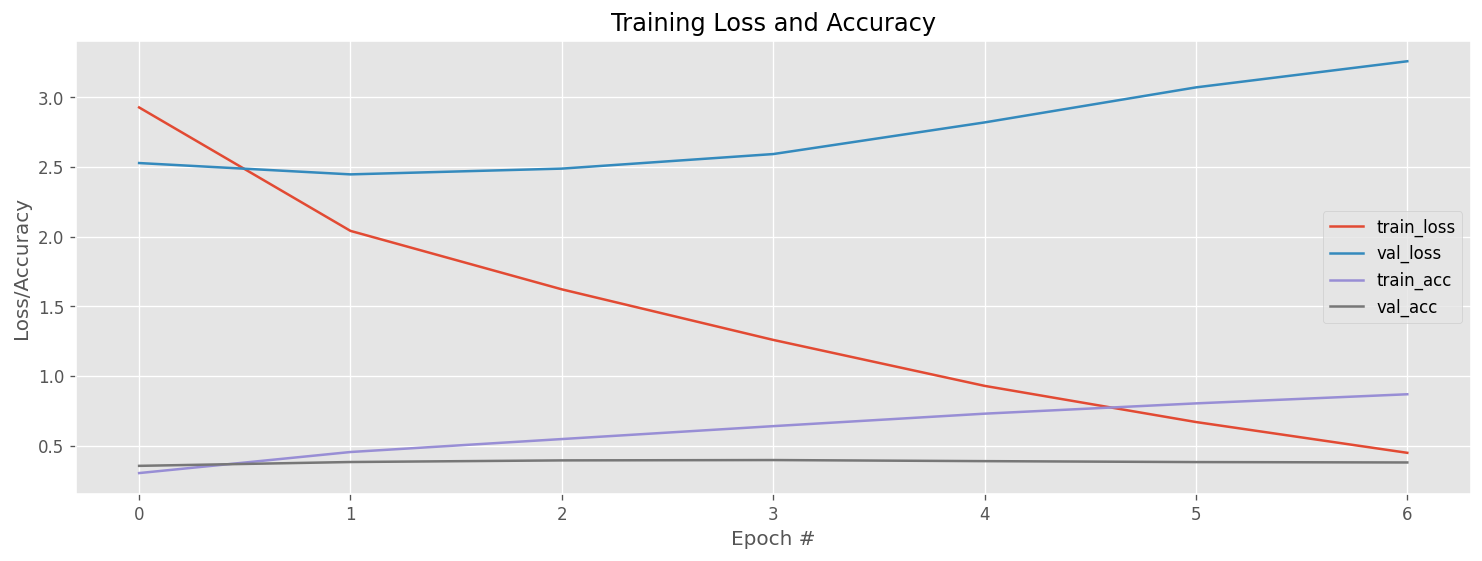

In [ ]:
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, early_stopping.stopped_epoch +1), H_pre.history['loss'], label= 'train_loss')
plt.plot(np.arange(0, early_stopping.stopped_epoch +1), H_pre.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, early_stopping.stopped_epoch +1), H_pre.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, early_stopping.stopped_epoch +1), H_pre.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

It can be observed how quickly an overfitting occurs in the first epochs performed.

##**Fine tuning- Sin mejoria** 

###**Congelados 16/17 bloques convolucionales** ---37% accuracy

In [ ]:
# Volvemos a cargar el base_model
base_model = ResNet50(weights='imagenet',
                 include_top=False,
                 input_shape=(32,32,3)) 

# Congelamos las capas deseadas
for layer in base_model.layers: 
  if layer.name == 'conv5_block3':
    break 
  layer.trainable = False 
  print('Capa ' + layer.name + ' congelada...') 


# Usamos la API funcional
last = base_model.layers[-1].output 
x = Flatten()(last) 
x = Dense(512, activation='relu', name='fc2')(x) 
x = Dense(100, activation='softmax', name='predictions')(x) 
model = Model(base_model.input, x) 

model.summary()

# Entrenando la solución
pre_trained_model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])
H_pre = pre_trained_model.fit( x_train, y_train, epochs = 20, batch_size= 128, validation_split= 0.2, callbacks=[early_stopping])

Capa input_2 congelada...
Capa conv1_pad congelada...
Capa conv1_conv congelada...
Capa conv1_bn congelada...
Capa conv1_relu congelada...
Capa pool1_pad congelada...
Capa pool1_pool congelada...
Capa conv2_block1_1_conv congelada...
Capa conv2_block1_1_bn congelada...
Capa conv2_block1_1_relu congelada...
Capa conv2_block1_2_conv congelada...
Capa conv2_block1_2_bn congelada...
Capa conv2_block1_2_relu congelada...
Capa conv2_block1_0_conv congelada...
Capa conv2_block1_3_conv congelada...
Capa conv2_block1_0_bn congelada...
Capa conv2_block1_3_bn congelada...
Capa conv2_block1_add congelada...
Capa conv2_block1_out congelada...
Capa conv2_block2_1_conv congelada...
Capa conv2_block2_1_bn congelada...
Capa conv2_block2_1_relu congelada...
Capa conv2_block2_2_conv congelada...
Capa conv2_block2_2_bn congelada...
Capa conv2_block2_2_relu congelada...
Capa conv2_block2_3_conv congelada...
Capa conv2_block2_3_bn congelada...
Capa conv2_block2_add congelada...
Capa conv2_block2_out congela

###**Congelados 15/17 bloques convolucionales** ---37% accuracy





In [ ]:
# Volvemos a cargar el base_model
base_model = ResNet50(weights='imagenet',
                 include_top=False,
                 input_shape=(32,32,3)) 

# Congelamos las capas deseadas
for layer in base_model.layers: 
  if layer.name == ' conv5_block2':
    break 
  layer.trainable = False 
  print('Capa ' + layer.name + ' congelada...') 


# Usamos la API funcional
last = base_model.layers[-1].output 
x = Flatten()(last) 
x = Dense(512, activation='relu', name='fc2')(x) 
x = Dense(100, activation='softmax', name='predictions')(x) 
model = Model(base_model.input, x) 

model.summary()

# Entrenando la solución
pre_trained_model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])
H_pre = pre_trained_model.fit( x_train, y_train, epochs = 20, batch_size= 128, validation_split= 0.2,  callbacks=[early_stopping])

Capa input_3 congelada...
Capa conv1_pad congelada...
Capa conv1_conv congelada...
Capa conv1_bn congelada...
Capa conv1_relu congelada...
Capa pool1_pad congelada...
Capa pool1_pool congelada...
Capa conv2_block1_1_conv congelada...
Capa conv2_block1_1_bn congelada...
Capa conv2_block1_1_relu congelada...
Capa conv2_block1_2_conv congelada...
Capa conv2_block1_2_bn congelada...
Capa conv2_block1_2_relu congelada...
Capa conv2_block1_0_conv congelada...
Capa conv2_block1_3_conv congelada...
Capa conv2_block1_0_bn congelada...
Capa conv2_block1_3_bn congelada...
Capa conv2_block1_add congelada...
Capa conv2_block1_out congelada...
Capa conv2_block2_1_conv congelada...
Capa conv2_block2_1_bn congelada...
Capa conv2_block2_1_relu congelada...
Capa conv2_block2_2_conv congelada...
Capa conv2_block2_2_bn congelada...
Capa conv2_block2_2_relu congelada...
Capa conv2_block2_3_conv congelada...
Capa conv2_block2_3_bn congelada...
Capa conv2_block2_add congelada...
Capa conv2_block2_out congela

###**Congelados 14/17 bloques convolucionales** ---37% accuracy


In [ ]:
# Volvemos a cargar el base_model
base_model = ResNet50(weights='imagenet',
                 include_top=False,
                 input_shape=(32,32,3)) 

# Congelamos las capas deseadas
for layer in base_model.layers: 
  if layer.name == ' conv5_block1':
    break 
  layer.trainable = False 
  print('Capa ' + layer.name + ' congelada...') 


# Usamos la API funcional
last = base_model.layers[-1].output 
x = Flatten()(last) 
x = Dense(512, activation='relu', name='fc2')(x) 
x = Dense(100, activation='softmax', name='predictions')(x) 
model = Model(base_model.input, x) 

model.summary()

# Entrenando la solución
pre_trained_model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])
H_pre = pre_trained_model.fit( x_train, y_train, epochs = 20, batch_size= 128, validation_split= 0.2,  callbacks=[early_stopping])

Capa input_4 congelada...
Capa conv1_pad congelada...
Capa conv1_conv congelada...
Capa conv1_bn congelada...
Capa conv1_relu congelada...
Capa pool1_pad congelada...
Capa pool1_pool congelada...
Capa conv2_block1_1_conv congelada...
Capa conv2_block1_1_bn congelada...
Capa conv2_block1_1_relu congelada...
Capa conv2_block1_2_conv congelada...
Capa conv2_block1_2_bn congelada...
Capa conv2_block1_2_relu congelada...
Capa conv2_block1_0_conv congelada...
Capa conv2_block1_3_conv congelada...
Capa conv2_block1_0_bn congelada...
Capa conv2_block1_3_bn congelada...
Capa conv2_block1_add congelada...
Capa conv2_block1_out congelada...
Capa conv2_block2_1_conv congelada...
Capa conv2_block2_1_bn congelada...
Capa conv2_block2_1_relu congelada...
Capa conv2_block2_2_conv congelada...
Capa conv2_block2_2_bn congelada...
Capa conv2_block2_2_relu congelada...
Capa conv2_block2_3_conv congelada...
Capa conv2_block2_3_bn congelada...
Capa conv2_block2_add congelada...
Capa conv2_block2_out congela

###**Congelados 13/17 bloques convolucionales** ---37% accuracy


Capa input_5 congelada...
Capa conv1_pad congelada...
Capa conv1_conv congelada...
Capa conv1_bn congelada...
Capa conv1_relu congelada...
Capa pool1_pad congelada...
Capa pool1_pool congelada...
Capa conv2_block1_1_conv congelada...
Capa conv2_block1_1_bn congelada...
Capa conv2_block1_1_relu congelada...
Capa conv2_block1_2_conv congelada...
Capa conv2_block1_2_bn congelada...
Capa conv2_block1_2_relu congelada...
Capa conv2_block1_0_conv congelada...
Capa conv2_block1_3_conv congelada...
Capa conv2_block1_0_bn congelada...
Capa conv2_block1_3_bn congelada...
Capa conv2_block1_add congelada...
Capa conv2_block1_out congelada...
Capa conv2_block2_1_conv congelada...
Capa conv2_block2_1_bn congelada...
Capa conv2_block2_1_relu congelada...
Capa conv2_block2_2_conv congelada...
Capa conv2_block2_2_bn congelada...
Capa conv2_block2_2_relu congelada...
Capa conv2_block2_3_conv congelada...
Capa conv2_block2_3_bn congelada...
Capa conv2_block2_add congelada...
Capa conv2_block2_out congela

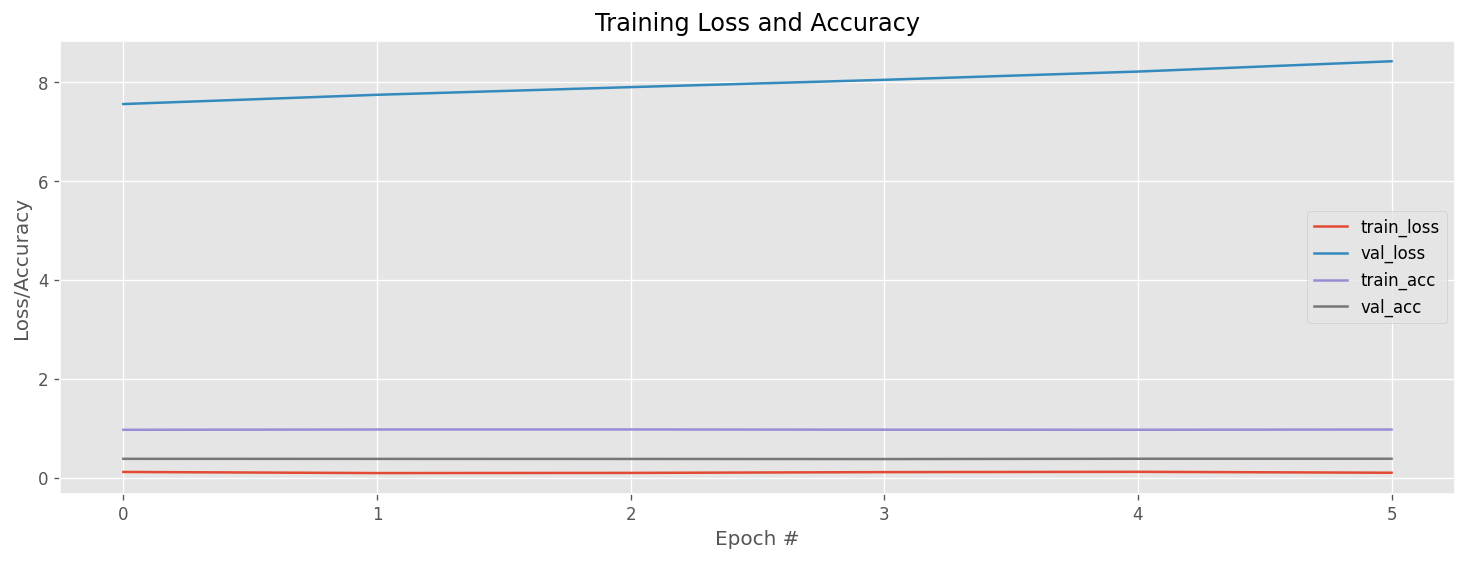

In [ ]:
# Volvemos a cargar el base_model
base_model = ResNet50(weights='imagenet',
                 include_top=False,
                 input_shape=(32,32,3)) 

# Congelamos las capas deseadas
for layer in base_model.layers: 
  if layer.name == ' conv4_block6':
    break 
  layer.trainable = False 
  print('Capa ' + layer.name + ' congelada...') 


# Usamos la API funcional
last = base_model.layers[-1].output 
x = Flatten()(last) 
x = Dense(512, activation='relu', name='fc2')(x) 
x = Dense(100, activation='softmax', name='predictions')(x) 
model = Model(base_model.input, x) 

model.summary()

# Entrenando la solución
pre_trained_model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])
H_pre = pre_trained_model.fit( x_train, y_train, epochs = 20, batch_size= 128, validation_split= 0.2, callbacks=[early_stopping])

predictions = pre_trained_model.predict(x_test, batch_size=128)

# Sacamos el report para test
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=LabelNames))

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, early_stopping.stopped_epoch +1), H_pre.history["loss"], label="train_loss")
plt.plot(np.arange(0, early_stopping.stopped_epoch +1), H_pre.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, early_stopping.stopped_epoch +1), H_pre.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, early_stopping.stopped_epoch +1), H_pre.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

###**Congelados 12/17 bloques convolucionales** ---37% accuracy

Capa input_6 congelada...
Capa conv1_pad congelada...
Capa conv1_conv congelada...
Capa conv1_bn congelada...
Capa conv1_relu congelada...
Capa pool1_pad congelada...
Capa pool1_pool congelada...
Capa conv2_block1_1_conv congelada...
Capa conv2_block1_1_bn congelada...
Capa conv2_block1_1_relu congelada...
Capa conv2_block1_2_conv congelada...
Capa conv2_block1_2_bn congelada...
Capa conv2_block1_2_relu congelada...
Capa conv2_block1_0_conv congelada...
Capa conv2_block1_3_conv congelada...
Capa conv2_block1_0_bn congelada...
Capa conv2_block1_3_bn congelada...
Capa conv2_block1_add congelada...
Capa conv2_block1_out congelada...
Capa conv2_block2_1_conv congelada...
Capa conv2_block2_1_bn congelada...
Capa conv2_block2_1_relu congelada...
Capa conv2_block2_2_conv congelada...
Capa conv2_block2_2_bn congelada...
Capa conv2_block2_2_relu congelada...
Capa conv2_block2_3_conv congelada...
Capa conv2_block2_3_bn congelada...
Capa conv2_block2_add congelada...
Capa conv2_block2_out congela

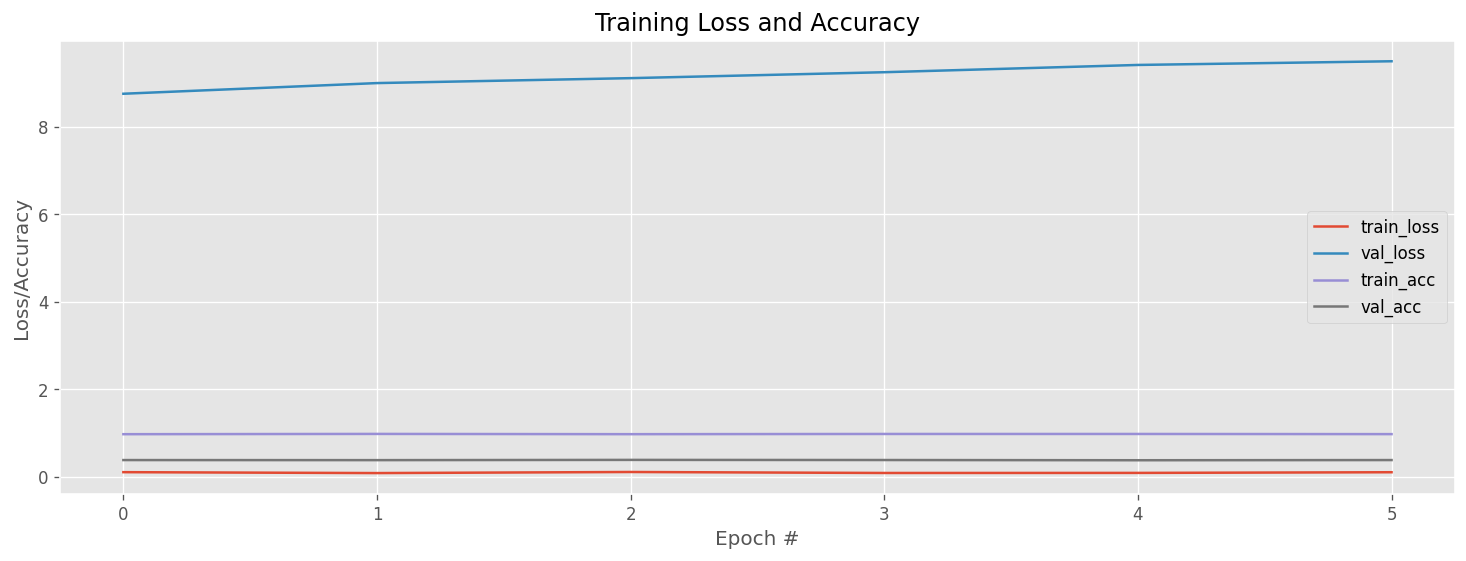

In [ ]:


# Volvemos a cargar el base_model
base_model = ResNet50(weights='imagenet',
                 include_top=False,
                 input_shape=(32,32,3)) 

# Congelamos las capas deseadas
for layer in base_model.layers: 
  if layer.name == ' conv4_block6':
    break 
  layer.trainable = False 
  print('Capa ' + layer.name + ' congelada...') 


# Usamos la API funcional
last = base_model.layers[-1].output 
x = Flatten()(last) 
x = Dense(512, activation='relu', name='fc2')(x) 
x = Dense(100, activation='softmax', name='predictions')(x) 
model = Model(base_model.input, x) 

model.summary()

# Entrenando la solución
pre_trained_model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])
H_pre = pre_trained_model.fit( x_train, y_train, epochs = 20, batch_size= 128, validation_split= 0.2,  callbacks=[early_stopping])

predictions = pre_trained_model.predict(x_test, batch_size=128)

# Sacamos el report para test
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)) 

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, early_stopping.stopped_epoch +1), H_pre.history["loss"], label="train_loss")
plt.plot(np.arange(0, early_stopping.stopped_epoch +1), H_pre.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, early_stopping.stopped_epoch +1), H_pre.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, early_stopping.stopped_epoch +1), H_pre.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

It is not possible to improve the network performance by applying Fine Tuning. The higher level layer of the MobileNet network is able to extract better information than could be extracted from the images of the problem dataset. 

Thus, it is interpreted that the ImageNet dataset has a good resemblance to the problem dataset. Another very important factor to take into account is that the dataset of the 60000 observation.

On the other hand, we can observe how the overfititng maintains a trend similar to the initial experiments, where a divergence between train and validation loss quickly occurs.

##Ajuste estructura top model

**Primer intento** --- Mejora en 1% del accuracy (39& acc)

In [ ]:
base_model.trainable = False
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(Flatten())
pre_trained_model.add(Dense(256, activation= 'relu'))
pre_trained_model.add(Dense(100, activation= 'softmax'))

#Training the model
pre_trained_model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics= ['accuracy'])
pre_trained_model.fit(x_train, y_train, batch_size =128, epochs =20, validation_split=0.2, callbacks=[early_stopping])

predictions = pre_trained_model.predict(x_test, batch_size=128)

# Sacamos el report para test
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=LabelNames))



Epoch 1/20
313/313 [==============================] - 18s 36ms/step - loss: 3.0568 - accuracy: 0.2844 - val_loss: 2.6135 - val_accuracy: 0.3493
Epoch 2/20
313/313 [==============================] - 7s 21ms/step - loss: 2.1648 - accuracy: 0.4315 - val_loss: 2.4798 - val_accuracy: 0.3788
Epoch 3/20
313/313 [==============================] - 7s 23ms/step - loss: 1.7970 - accuracy: 0.5107 - val_loss: 2.4724 - val_accuracy: 0.3913
Epoch 4/20
313/313 [==============================] - 7s 21ms/step - loss: 1.5012 - accuracy: 0.5811 - val_loss: 2.5716 - val_accuracy: 0.3812
Epoch 5/20
313/313 [==============================] - 7s 23ms/step - loss: 1.2364 - accuracy: 0.6463 - val_loss: 2.6477 - val_accuracy: 0.3873
Epoch 6/20
313/313 [==============================] - 7s 21ms/step - loss: 1.0059 - accuracy: 0.7078 - val_loss: 2.8186 - val_accuracy: 0.3825
Epoch 7/20
313/313 [==============================] - 7s 22ms/step - loss: 0.7994 - accuracy: 0.7692 - val_loss: 3.0337 - val_accuracy: 0.380

**2 intento** -- 39% acc (Sin mejoria)

In [ ]:
base_model.trainable = False
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(1024, activation='relu'))
pre_trained_model.add(layers.Dense(256, activation= 'relu'))
pre_trained_model.add(layers.Dense(100, activation= 'softmax'))

#Training the model
pre_trained_model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics= ['accuracy'])
pre_trained_model.fit(x_train, y_train, batch_size =128, epochs =20, validation_split=0.2, callbacks=[early_stopping])

predictions = pre_trained_model.predict(x_test, batch_size=128)

# Sacamos el report para test
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=LabelNames))



Epoch 1/20
313/313 [==============================] - 13s 27ms/step - loss: 2.9278 - accuracy: 0.2949 - val_loss: 2.5190 - val_accuracy: 0.3593
Epoch 2/20
313/313 [==============================] - 7s 21ms/step - loss: 2.1163 - accuracy: 0.4349 - val_loss: 2.4264 - val_accuracy: 0.3800
Epoch 3/20
313/313 [==============================] - 7s 23ms/step - loss: 1.7078 - accuracy: 0.5258 - val_loss: 2.4481 - val_accuracy: 0.4002
Epoch 4/20
313/313 [==============================] - 8s 26ms/step - loss: 1.3452 - accuracy: 0.6160 - val_loss: 2.5629 - val_accuracy: 0.3959
Epoch 5/20
313/313 [==============================] - 7s 22ms/step - loss: 0.9911 - accuracy: 0.7093 - val_loss: 2.7887 - val_accuracy: 0.3965
Epoch 6/20
313/313 [==============================] - 7s 23ms/step - loss: 0.6794 - accuracy: 0.7941 - val_loss: 3.0880 - val_accuracy: 0.3896
Epoch 7/20
79/79 [==============================] - 2s 15ms/step
               precision    recall  f1-score   support

        apple       

## Ajuste parametros de regularizacion

### Weigth regularization (sin mejora) --39%

In [ ]:
base_model.trainable = False
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(1024, activation='relu', kernel_regularizer = regularizers.l2(0.01)))
pre_trained_model.add(layers.Dense(256, activation= 'relu', kernel_regularizer =regularizers.l2(0.01)))
pre_trained_model.add(layers.Dense(100, activation= 'softmax'))

#Training the model
pre_trained_model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics= ['accuracy'])
pre_trained_model.fit(x_train, y_train, batch_size =128, epochs =20, validation_split=0.2, callbacks=[early_stopping])

predictions = pre_trained_model.predict(x_test, batch_size=128)

# Sacamos el report para test
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=LabelNames))



Epoch 1/20
313/313 [==============================] - 13s 26ms/step - loss: 7.1834 - accuracy: 0.2898 - val_loss: 3.6020 - val_accuracy: 0.3351
Epoch 2/20
313/313 [==============================] - 7s 23ms/step - loss: 3.2168 - accuracy: 0.3576 - val_loss: 3.0957 - val_accuracy: 0.3523
Epoch 3/20
313/313 [==============================] - 8s 26ms/step - loss: 2.9508 - accuracy: 0.3718 - val_loss: 2.9805 - val_accuracy: 0.3637
Epoch 4/20
313/313 [==============================] - 7s 22ms/step - loss: 2.8571 - accuracy: 0.3801 - val_loss: 2.9166 - val_accuracy: 0.3666
Epoch 5/20
313/313 [==============================] - 7s 23ms/step - loss: 2.7832 - accuracy: 0.3904 - val_loss: 2.8621 - val_accuracy: 0.3699
Epoch 6/20
313/313 [==============================] - 7s 22ms/step - loss: 2.7345 - accuracy: 0.3974 - val_loss: 2.8733 - val_accuracy: 0.3634
Epoch 7/20
313/313 [==============================] - 7s 23ms/step - loss: 2.6957 - accuracy: 0.4009 - val_loss: 2.8138 - val_accuracy: 0.375

##Dropout

In [ ]:
base_model.trainable = False
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(1024, activation='relu'))
pre_trained_model.add(Dropout(0.75))
pre_trained_model.add(layers.Dense(256, activation= 'relu'))
pre_trained_model.add(Dropout(0.75))
pre_trained_model.add(layers.Dense(100, activation= 'softmax'))

#Training the model
pre_trained_model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics= ['accuracy'])
pre_trained_model.fit(x_train, y_train, batch_size =128, epochs =20, validation_split=0.2, callbacks=[early_stopping])

predictions = pre_trained_model.predict(x_test, batch_size=128)

# Sacamos el report para test
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=LabelNames))



Epoch 1/20
313/313 [==============================] - 12s 28ms/step - loss: 5.1199 - accuracy: 0.0122 - val_loss: 4.5940 - val_accuracy: 0.0132
Epoch 2/20
313/313 [==============================] - 7s 22ms/step - loss: 4.5831 - accuracy: 0.0174 - val_loss: 4.4544 - val_accuracy: 0.0393
Epoch 3/20
313/313 [==============================] - 7s 22ms/step - loss: 4.5254 - accuracy: 0.0230 - val_loss: 4.3362 - val_accuracy: 0.0496
Epoch 4/20
313/313 [==============================] - 7s 23ms/step - loss: 4.4658 - accuracy: 0.0281 - val_loss: 4.2449 - val_accuracy: 0.0601
Epoch 5/20
313/313 [==============================] - 7s 22ms/step - loss: 4.4082 - accuracy: 0.0327 - val_loss: 4.1403 - val_accuracy: 0.0742
Epoch 6/20
313/313 [==============================] - 7s 23ms/step - loss: 4.3481 - accuracy: 0.0391 - val_loss: 4.0595 - val_accuracy: 0.0817
Epoch 7/20
313/313 [==============================] - 7s 22ms/step - loss: 4.2830 - accuracy: 0.0453 - val_loss: 3.9580 - val_accuracy: 0.088

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Batchnormalization

In [ ]:
base_model.trainable = False
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(1024, activation='relu'))
pre_trained_model.add(BatchNormalization())
pre_trained_model.add(layers.Dense(256, activation= 'relu'))
pre_trained_model.add(BatchNormalization())
pre_trained_model.add(layers.Dense(100, activation= 'softmax'))

#Training the model
pre_trained_model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics= ['accuracy'])
pre_trained_model.fit(x_train, y_train, batch_size =128, epochs =20, validation_split=0.2, callbacks=[early_stopping])

predictions = pre_trained_model.predict(x_test, batch_size=128)

# Sacamos el report para test
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=LabelNames))



Epoch 1/20
313/313 [==============================] - 15s 27ms/step - loss: 2.6503 - accuracy: 0.3358 - val_loss: 2.3532 - val_accuracy: 0.3870
Epoch 2/20
313/313 [==============================] - 7s 23ms/step - loss: 1.9465 - accuracy: 0.4732 - val_loss: 2.3104 - val_accuracy: 0.4073
Epoch 3/20
313/313 [==============================] - 7s 24ms/step - loss: 1.5613 - accuracy: 0.5643 - val_loss: 2.3464 - val_accuracy: 0.4052
Epoch 4/20
313/313 [==============================] - 7s 23ms/step - loss: 1.2132 - accuracy: 0.6544 - val_loss: 2.5118 - val_accuracy: 0.4023
Epoch 5/20
313/313 [==============================] - 7s 24ms/step - loss: 0.8708 - accuracy: 0.7472 - val_loss: 2.6448 - val_accuracy: 0.3998
Epoch 6/20
313/313 [==============================] - 7s 23ms/step - loss: 0.5815 - accuracy: 0.8306 - val_loss: 2.8847 - val_accuracy: 0.3992
Epoch 7/20
79/79 [==============================] - 2s 14ms/step
               precision    recall  f1-score   support

        apple       

###Combinacion de las tres

In [ ]:
base_model.trainable = False
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(1024, activation='relu', kernel_regularizer = regularizers.l2(0.01)))
pre_trained_model.add(BatchNormalization())
pre_trained_model.add(Dropout(0.75))
pre_trained_model.add(layers.Dense(256, activation= 'relu', kernel_regularizer =regularizers.l2(0.01)))
pre_trained_model.add(BatchNormalization())
pre_trained_model.add(Dropout(0.75))
pre_trained_model.add(layers.Dense(100, activation= 'softmax'))

#Training the model
pre_trained_model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics= ['accuracy'])
pre_trained_model.fit(x_train, y_train, batch_size =128, epochs =20, validation_split=0.2, callbacks=[early_stopping])

predictions = pre_trained_model.predict(x_test, batch_size=128)

# Sacamos el report para test
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=LabelNames))



Epoch 1/20
313/313 [==============================] - 14s 27ms/step - loss: 12.7908 - accuracy: 0.1041 - val_loss: 6.5750 - val_accuracy: 0.2931
Epoch 2/20
313/313 [==============================] - 7s 23ms/step - loss: 5.9389 - accuracy: 0.1833 - val_loss: 4.6462 - val_accuracy: 0.3139
Epoch 3/20
313/313 [==============================] - 7s 23ms/step - loss: 4.8658 - accuracy: 0.2113 - val_loss: 4.2254 - val_accuracy: 0.3059
Epoch 4/20
313/313 [==============================] - 7s 22ms/step - loss: 4.5676 - accuracy: 0.2204 - val_loss: 4.0716 - val_accuracy: 0.3146
Epoch 5/20
313/313 [==============================] - 7s 24ms/step - loss: 4.4301 - accuracy: 0.2304 - val_loss: 4.0123 - val_accuracy: 0.3152
Epoch 6/20
313/313 [==============================] - 7s 22ms/step - loss: 4.3941 - accuracy: 0.2259 - val_loss: 4.0130 - val_accuracy: 0.3169
Epoch 7/20
313/313 [==============================] - 7s 23ms/step - loss: 4.3617 - accuracy: 0.2333 - val_loss: 3.9683 - val_accuracy: 0.32

By applying regularization methods we did not manage to increase the acuracy in the same way we did not manage to improve the overfitting. 
Overall our first strategy has not provided a very high accuracy so we will see what results we get in the second strategy.

# Estartegia 2: entrenando desde 0

## 1. Diseño de la arquitectura

### 1.1 test(16% accuracy)

[INFO]: Entrenando la red...
Epoch 1/20
313/313 [==============================] - 58s 136ms/step - loss: 5.3363 - accuracy: 0.0088 - val_loss: 4.6060 - val_accuracy: 0.0077
Epoch 2/20
313/313 [==============================] - 40s 128ms/step - loss: 4.6054 - accuracy: 0.0089 - val_loss: 4.6065 - val_accuracy: 0.0077
Epoch 3/20
313/313 [==============================] - 40s 129ms/step - loss: 4.6053 - accuracy: 0.0095 - val_loss: 4.6070 - val_accuracy: 0.0077
Epoch 4/20
313/313 [==============================] - 42s 135ms/step - loss: 4.6053 - accuracy: 0.0103 - val_loss: 4.6073 - val_accuracy: 0.0077
Epoch 5/20
313/313 [==============================] - 43s 136ms/step - loss: 4.6053 - accuracy: 0.0104 - val_loss: 4.6075 - val_accuracy: 0.0077
Epoch 6/20
79/79 [==============================] - 3s 34ms/step


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

        apple       0.00      0.00      0.00       100
aquarium_fish       0.00      0.00      0.00       100
         baby       0.00      0.00      0.00       100
         bear       0.00      0.00      0.00       100
       beaver       0.00      0.00      0.00       100
          bed       0.00      0.00      0.00       100
          bee       0.00      0.00      0.00       100
       beetle       0.00      0.00      0.00       100
      bicycle       0.01      1.00      0.02       100
       bottle       0.00      0.00      0.00       100
         bowl       0.00      0.00      0.00       100
          boy       0.00      0.00      0.00       100
       bridge       0.00      0.00      0.00       100
          bus       0.00      0.00      0.00       100
    butterfly       0.00      0.00      0.00       100
        camel       0.00      0.00      0.00       100
          can       0.00      0.00      0.00       100
       ca

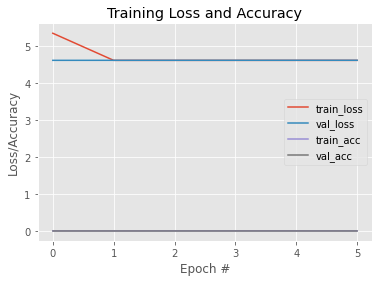

In [ ]:

inputs = Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]))

#Base Model

# primer bloque
x1= Conv2D(32, (3, 3), padding= 'same', activation= 'relu')(inputs)
#x1= BatchNormalization()(x1)
x1= Conv2D(32, (3,3), padding= 'same', activation = 'relu')(x1)
#x1= BatchNormalization()(x1)
#x1= MaxPooling2D(pool_size = (2,2))(x1)
#x1 = Dropout(0.25)(x1)

#segundo bloque
x2 = Conv2D(64, (3, 3), padding= 'same', activation = 'relu')(x1)
#x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
#x2 = BatchNormalization()(x2)
#x2 = MaxPooling2D(pool_size=(2, 2))(x2)
#x2 = Dropout(0.25)(x2)

# 3 bloque

x2 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2)
#x2 = BatchNormalization()(x2)
x2 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2)
#x2 = BatchNormalization()(x2)
#x2 = MaxPooling2D(pool_size=(2, 2))(x2)
#x2 = Dropout(0.25)(x2)

#Top model

xfc = Flatten()(x2)
xfc = Dense(512, activation="relu")(xfc)
#xfc = BatchNormalization()(xfc)
#xfc = Dropout(0.5)(xfc)

# Clasificador softmax
predictions = Dense(100, activation="softmax")(xfc)


model = Model(inputs=inputs, outputs=predictions)

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"]) 

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H_pre = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, callbacks=[early_stopping])

predictions =model.predict(x_test, batch_size=128)

# Sacamos el report para test
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=LabelNames))

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, early_stopping.stopped_epoch +1), H_pre.history["loss"], label="train_loss")
plt.plot(np.arange(0, early_stopping.stopped_epoch +1), H_pre.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, early_stopping.stopped_epoch +1), H_pre.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, early_stopping.stopped_epoch +1), H_pre.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()


### 1.2 test (18% de accuracy)

In [ ]:
# Definimos entradas
inputs = Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]))

# 1 set de capas 
x1 = Conv2D(64, (3, 3), padding="same", activation="relu")(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
# x1 = MaxPooling2D(pool_size=(2, 2))(x1)
# x1 = Dropout(0.25)(x1)

# 2 set de capas 
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
# x2 = Dropout(0.25)(x2)


# 3 set de capas 
x3 = Conv2D(32, (3, 3), padding="same", activation="relu")(x2)
x3 = BatchNormalization()(x3)
x3 = Conv2D(32, (3, 3), padding="same", activation="relu")(x3)
x3 = BatchNormalization()(x3)
# x3 = MaxPooling2D(pool_size=(2, 2))(x3)
# x3 = Dropout(0.25)(x3)

# 4 set de capas 
x4 = Conv2D(32, (3, 3), padding="same", activation="relu")(x3)
x4 = BatchNormalization()(x4)
x4 = Conv2D(32, (3, 3), padding="same", activation="relu")(x4)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2))(x4)
# x4 = Dropout(0.25)(x4)


# 5 set de capas 
x5 = Conv2D(16, (3, 3), padding="same", activation="relu")(x4)
x5 = BatchNormalization()(x5)
x5 = Conv2D(16, (3, 3), padding="same", activation="relu")(x5)
x5 = BatchNormalization()(x5)
# x5 = MaxPooling2D(pool_size=(2, 2))(x5)
# x5 = Dropout(0.25)(x5)

# 6 set de capas 
x6 = Conv2D(16, (3, 3), padding="same", activation="relu")(x5)
x6 = BatchNormalization()(x6)
x6 = Conv2D(16, (3, 3), padding="same", activation="relu")(x6)
x6 = BatchNormalization()(x6)
# x6 = MaxPooling2D(pool_size=(2, 2))(x6)
# x6 = Dropout(0.25)(x6)


# 7 set de capas 
x7 = Conv2D(8, (3, 3), padding="same", activation="relu")(x6)
x7 = BatchNormalization()(x7)
x7 = Conv2D(8, (3, 3), padding="same", activation="relu")(x7)
x7 = BatchNormalization()(x7)
# x7 = MaxPooling2D(pool_size=(2, 2))(x5)
# x7 = Dropout(0.25)(x7)

# 8 set de capas 
x8 = Conv2D(8, (3, 3), padding="same", activation="relu")(x7)
x8 = BatchNormalization()(x8)
x8 = Conv2D(8, (3, 3), padding="same", activation="relu")(x8)
x8 = BatchNormalization()(x8)
# x8 = MaxPooling2D(pool_size=(2, 2))(x8)
# x8 = Dropout(0.25)(x6)

# 9 set de capas 
x9 = Conv2D(8, (3, 3), padding="same", activation="relu")(x8)
x9 = BatchNormalization()(x9)
x9 = Conv2D(8, (3, 3), padding="same", activation="relu")(x9)
x9 = BatchNormalization()(x9)
# x8 = MaxPooling2D(pool_size=(2, 2))(x8)
# x8 = Dropout(0.25)(x8)

# 10 set de capas 
x8 = Conv2D(8, (3, 3), padding="same", activation="relu")(x9)
x8 = BatchNormalization()(x8)
x8 = Conv2D(8, (3, 3), padding="same", activation="relu")(x8)
x8 = BatchNormalization()(x8)
# x8 = MaxPooling2D(pool_size=(2, 2))(x8)
# x8 = Dropout(0.25)(x8)

# 11 set de capas
x8 = Conv2D(8, (3, 3), padding="same", activation="relu")(x8)
x8 = BatchNormalization()(x8)
x8 = Conv2D(8, (3, 3), padding="same", activation="relu")(x8)
x8 = BatchNormalization()(x8)
# x8 = MaxPooling2D(pool_size=(2, 2))(x8)
# x8 = Dropout(0.25)(x8)

# 12 set de capas 
x8 = Conv2D(8, (3, 3), padding="same", activation="relu")(x8)
x8 = BatchNormalization()(x8)
x8 = Conv2D(8, (3, 3), padding="same", activation="relu")(x8)
x8 = BatchNormalization()(x8)
# x8 = MaxPooling2D(pool_size=(2, 2))(x8)
# x8 = Dropout(0.25)(x8)


# 13 set de capas 
x9 = Conv2D(4, (3, 3), padding="same", activation="relu")(x8)
x9 = BatchNormalization()(x9)
x9 = Conv2D(4, (3, 3), padding="same", activation="relu")(x9)
x9 = BatchNormalization()(x9)
# x9 = MaxPooling2D(pool_size=(2, 2))(x9)
# x9 = Dropout(0.25)(x9)

# 14 set de capas 
x10 = Conv2D(4, (3, 3), padding="same", activation="relu")(x9)
x10 = BatchNormalization()(x10)
x10 = Conv2D(4, (3, 3), padding="same", activation="relu")(x10)
x10 = BatchNormalization()(x10)
# x10 = MaxPooling2D(pool_size=(2, 2))(x10)
# x10 = Dropout(0.25)(x10)


# TOP MODEL 


xfc = Flatten()(x10)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)

# Clasificador softmax
predictions = Dense(100, activation="softmax")(xfc)


#Creamos el modelo
model = Model(inputs=inputs, outputs=predictions)


model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"]) 

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H_pre = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, callbacks=[callback])

predictions =model.predict(x_test, batch_size=128)

# Sacamos el report para test
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=LabelNames))



[INFO]: Entrenando la red...
Epoch 1/20
313/313 [==============================] - 59s 74ms/step - loss: 5.2761 - accuracy: 0.0152 - val_loss: 4.7838 - val_accuracy: 0.0195
Epoch 2/20
313/313 [==============================] - 21s 68ms/step - loss: 4.6959 - accuracy: 0.0259 - val_loss: 4.5414 - val_accuracy: 0.0395
Epoch 3/20
313/313 [==============================] - 16s 52ms/step - loss: 4.4870 - accuracy: 0.0371 - val_loss: 4.3850 - val_accuracy: 0.0539
Epoch 4/20
313/313 [==============================] - 16s 50ms/step - loss: 4.3229 - accuracy: 0.0521 - val_loss: 4.3008 - val_accuracy: 0.0601
Epoch 5/20
313/313 [==============================] - 16s 50ms/step - loss: 4.2342 - accuracy: 0.0557 - val_loss: 4.1701 - val_accuracy: 0.0673
Epoch 6/20
313/313 [==============================] - 15s 49ms/step - loss: 4.1737 - accuracy: 0.0660 - val_loss: 4.0233 - val_accuracy: 0.0720
Epoch 7/20
313/313 [==============================] - 15s 49ms/step - loss: 4.0866 - accuracy: 0.0725 - val

### 1.3 test-- 20% acc

In [ ]:
inputs = Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]))

# 1 set de capas CONV 
x1 = Conv2D(64, (3, 3), padding="same", activation="relu")(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
# x1 = MaxPooling2D(pool_size=(2, 2))(x1)
# x1 = Dropout(0.25)(x1)

# 2 set de capas CONV 
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
# x2 = MaxPooling2D(pool_size=(2, 2))(x2)
# x2 = Dropout(0.25)(x2)


# 3 set de capas CONV 
x1 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x1 = BatchNormalization()(x1)
x1 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
# x1 = MaxPooling2D(pool_size=(2, 2))(x1)
# x1 = Dropout(0.25)(x1)

# 4 set de capas CONV
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
# x2 = Dropout(0.25)(x2)


# 5 set de capas CONV 
x3 = Conv2D(32, (3, 3), padding="same", activation="relu")(x2)
x3 = BatchNormalization()(x3)
x3 = Conv2D(32, (3, 3), padding="same", activation="relu")(x3)
x3 = BatchNormalization()(x3)
# x3 = MaxPooling2D(pool_size=(2, 2))(x3)
# x3 = Dropout(0.25)(x3)

# 6 set de capas CONV 
x4 = Conv2D(32, (3, 3), padding="same", activation="relu")(x3)
x4 = BatchNormalization()(x4)
x4 = Conv2D(32, (3, 3), padding="same", activation="relu")(x4)
x4 = BatchNormalization()(x4)
# x4 = MaxPooling2D(pool_size=(2, 2))(x4)
# x4 = Dropout(0.25)(x4)

# 7 set de capas CONV 
x3 = Conv2D(32, (3, 3), padding="same", activation="relu")(x4)
x3 = BatchNormalization()(x3)
x3 = Conv2D(32, (3, 3), padding="same", activation="relu")(x3)
x3 = BatchNormalization()(x3)
# x3 = MaxPooling2D(pool_size=(2, 2))(x3)
# x3 = Dropout(0.25)(x3)

# 8 set de capas CONV 
x4 = Conv2D(32, (3, 3), padding="same", activation="relu")(x3)
x4 = BatchNormalization()(x4)
x4 = Conv2D(32, (3, 3), padding="same", activation="relu")(x4)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2))(x4)
# x4 = Dropout(0.25)(x4)



# 9 set de capas CONV 
x5 = Conv2D(16, (3, 3), padding="same", activation="relu")(x4)
x5 = BatchNormalization()(x5)
x5 = Conv2D(16, (3, 3), padding="same", activation="relu")(x5)
x5 = BatchNormalization()(x5)
# x5 = MaxPooling2D(pool_size=(2, 2))(x5)
# x5 = Dropout(0.25)(x5)

# 10 set de capas CONV 
x6 = Conv2D(16, (3, 3), padding="same", activation="relu")(x5)
x6 = BatchNormalization()(x6)
x6 = Conv2D(16, (3, 3), padding="same", activation="relu")(x6)
x6 = BatchNormalization()(x6)
# x6 = MaxPooling2D(pool_size=(2, 2))(x6)
# x6 = Dropout(0.25)(x6)


# 11 set de capas CONV
x8 = Conv2D(8, (3, 3), padding="same", activation="relu")(x6)
x8 = BatchNormalization()(x8)
x8 = Conv2D(8, (3, 3), padding="same", activation="relu")(x8)
x8 = BatchNormalization()(x8)
# x8 = MaxPooling2D(pool_size=(2, 2))(x8)
# x8 = Dropout(0.25)(x8)

# 12 set de capas CONV 
x8 = Conv2D(8, (3, 3), padding="same", activation="relu")(x8)
x8 = BatchNormalization()(x8)
x8 = Conv2D(8, (3, 3), padding="same", activation="relu")(x8)
x8 = BatchNormalization()(x8)
# x8 = MaxPooling2D(pool_size=(2, 2))(x8)
# x8 = Dropout(0.25)(x8)

# 13 set de capas CONV 
x8 = Conv2D(8, (3, 3), padding="same", activation="relu")(x8)
x8 = BatchNormalization()(x8)
x8 = Conv2D(8, (3, 3), padding="same", activation="relu")(x8)
x8 = BatchNormalization()(x8)
# x8 = MaxPooling2D(pool_size=(2, 2))(x8)
# x8 = Dropout(0.25)(x8)

# 14 set de capas CONV
x8 = Conv2D(8, (3, 3), padding="same", activation="relu")(x8)
x8 = BatchNormalization()(x8)
x8 = Conv2D(8, (3, 3), padding="same", activation="relu")(x8)
x8 = BatchNormalization()(x8)
# x8 = MaxPooling2D(pool_size=(2, 2))(x8)
# x8 = Dropout(0.25)(x8)


# 15 set de capas CONV 
x9 = Conv2D(4, (3, 3), padding="same", activation="relu")(x8)
x9 = BatchNormalization()(x9)
x9 = Conv2D(4, (3, 3), padding="same", activation="relu")(x9)
x9 = BatchNormalization()(x9)
# x9 = MaxPooling2D(pool_size=(2, 2))(x9)
# x9 = Dropout(0.25)(x9)

# 16 set de capas CONV
x10 = Conv2D(4, (3, 3), padding="same", activation="relu")(x9)
x10 = BatchNormalization()(x10)
x10 = Conv2D(4, (3, 3), padding="same", activation="relu")(x10)
x10 = BatchNormalization()(x10)
# x10 = MaxPooling2D(pool_size=(2, 2))(x10)
# x10 = Dropout(0.25)(x10)


# TOP MODEL 


xfc = Flatten()(x10)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)

# Clasificador softmax
predictions = Dense(100, activation="softmax")(xfc)


#Creamos el modelo
model = Model(inputs=inputs, outputs=predictions)

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"]) 

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H_pre = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, callbacks=[early_stopping])

predictions =model.predict(x_test, batch_size=128)

# Sacamos el report para test
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=LabelNames))



[INFO]: Entrenando la red...
Epoch 1/20
313/313 [==============================] - 47s 88ms/step - loss: 5.3540 - accuracy: 0.0113 - val_loss: 6.5545 - val_accuracy: 0.0114
Epoch 2/20
313/313 [==============================] - 27s 86ms/step - loss: 4.8968 - accuracy: 0.0137 - val_loss: 4.9249 - val_accuracy: 0.0214
Epoch 3/20
313/313 [==============================] - 26s 82ms/step - loss: 4.6667 - accuracy: 0.0292 - val_loss: 4.4453 - val_accuracy: 0.0463
Epoch 4/20
313/313 [==============================] - 27s 85ms/step - loss: 4.4273 - accuracy: 0.0493 - val_loss: 4.7522 - val_accuracy: 0.0628
Epoch 5/20
313/313 [==============================] - 27s 85ms/step - loss: 4.3130 - accuracy: 0.0596 - val_loss: 4.3518 - val_accuracy: 0.0667
Epoch 6/20
313/313 [==============================] - 27s 85ms/step - loss: 4.2508 - accuracy: 0.0658 - val_loss: 4.2335 - val_accuracy: 0.0787
Epoch 7/20
313/313 [==============================] - 27s 85ms/step - loss: 4.1459 - accuracy: 0.0773 - val

### 1.4 Test-- 15 % acc

In [ ]:

# Definimos entradas
inputs = Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]))

# Primer set de capas CONV 
x1 = Conv2D(128, (3, 3), padding="same", activation="relu")(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv2D(128, (3, 3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Dropout(0.25)(x1)

# Segundo set de capas CONV
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

# Tercer set de capas CONV 
x2 = Conv2D(32, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(32, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

# TOP MODEL 


xfc = Flatten()(x2)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)

# Clasificador softmax
predictions = Dense(100, activation="softmax")(xfc)


#Creamos el modelo
model = Model(inputs=inputs, outputs=predictions)

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"]) 

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H_pre = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, callbacks=[early_stopping])

predictions =model.predict(x_test, batch_size=128)

# Sacamos el report para test
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=LabelNames))


[INFO]: Entrenando la red...
Epoch 1/20
313/313 [==============================] - 23s 56ms/step - loss: 4.4610 - accuracy: 0.0828 - val_loss: 3.6057 - val_accuracy: 0.1741
Epoch 2/20
313/313 [==============================] - 17s 54ms/step - loss: 3.6117 - accuracy: 0.1665 - val_loss: 3.1262 - val_accuracy: 0.2425
Epoch 3/20
313/313 [==============================] - 16s 52ms/step - loss: 3.1807 - accuracy: 0.2306 - val_loss: 2.8280 - val_accuracy: 0.2952
Epoch 4/20
313/313 [==============================] - 17s 54ms/step - loss: 2.8622 - accuracy: 0.2817 - val_loss: 2.6371 - val_accuracy: 0.3341
Epoch 5/20
313/313 [==============================] - 17s 54ms/step - loss: 2.6212 - accuracy: 0.3291 - val_loss: 2.3526 - val_accuracy: 0.3844
Epoch 6/20
313/313 [==============================] - 16s 52ms/step - loss: 2.4546 - accuracy: 0.3596 - val_loss: 2.3220 - val_accuracy: 0.3963
Epoch 7/20
313/313 [==============================] - 17s 54ms/step - loss: 2.3213 - accuracy: 0.3909 - val

### 1.5º Test --16% acc

In [ ]:
# Definimos entradas
inputs = Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]))

# Primer set de capas CONV 
x1 = Conv2D(128, (3, 3), padding="same", activation="relu")(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv2D(128, (3, 3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Dropout(0.25)(x1)

# Segundo set de capas CONV 
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

# Segundo set de capas CONV 
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
# x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

# Tercer set de capas CONV 
x2 = Conv2D(32, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(32, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

# Tercer set de capas CONV
x2 = Conv2D(32, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(32, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
# x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

# Tercer set de capas CONV 
x2 = Conv2D(16, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(16, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
# x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

# TOP MODEL 

xfc = Flatten()(x2)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)

# Clasificador softmax
predictions = Dense(100, activation="softmax")(xfc)


#Creamos el modelo
model = Model(inputs=inputs, outputs=predictions)

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"]) 

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H_pre = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, callbacks=[early_stopping])

predictions =model.predict(x_test, batch_size=128)

# Sacamos el report para test
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=LabelNames))



[INFO]: Entrenando la red...
Epoch 1/20
313/313 [==============================] - 33s 63ms/step - loss: 4.8836 - accuracy: 0.0307 - val_loss: 4.3817 - val_accuracy: 0.0727
Epoch 2/20
313/313 [==============================] - 18s 58ms/step - loss: 4.2303 - accuracy: 0.0717 - val_loss: 3.9084 - val_accuracy: 0.1064
Epoch 3/20
313/313 [==============================] - 18s 58ms/step - loss: 3.9602 - accuracy: 0.0997 - val_loss: 3.7304 - val_accuracy: 0.1448
Epoch 4/20
313/313 [==============================] - 18s 57ms/step - loss: 3.7773 - accuracy: 0.1258 - val_loss: 3.5726 - val_accuracy: 0.1556
Epoch 5/20
313/313 [==============================] - 19s 60ms/step - loss: 3.6461 - accuracy: 0.1479 - val_loss: 4.3438 - val_accuracy: 0.1587
Epoch 6/20
313/313 [==============================] - 18s 59ms/step - loss: 3.5099 - accuracy: 0.1670 - val_loss: 3.2233 - val_accuracy: 0.2118
Epoch 7/20
313/313 [==============================] - 19s 62ms/step - loss: 3.3441 - accuracy: 0.1893 - val

### 1.6º Test-- 18% acc

In [ ]:
inputs = Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]))

# 1 set de capas 
x1 = Conv2D(256, (3, 3), padding="same", activation="relu")(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv2D(256, (3, 3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Dropout(0.25)(x1)

# 2 set de capas
x1 = Conv2D(128, (3, 3), padding="same", activation="relu")(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv2D(128, (3, 3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Dropout(0.25)(x1)

# 3 set de capas 
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

# 4 set de capas 
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
# x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)


# 5 set de capas 
x4 = Conv2D(32, (3, 3), padding="same", activation="relu")(x2)
x4 = BatchNormalization()(x4)
x4 = Conv2D(32, (3, 3), padding="same", activation="relu")(x4)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2))(x4)
x4 = Dropout(0.25)(x4)


# 6 set de capas 
x6 = Conv2D(16, (3, 3), padding="same", activation="relu")(x4)
x6 = BatchNormalization()(x6)
x6 = Conv2D(16, (3, 3), padding="same", activation="relu")(x6)
x6 = BatchNormalization()(x6)
# x6 = MaxPooling2D(pool_size=(2, 2))(x6)
x6 = Dropout(0.25)(x6)


# TOP MODEL 


xfc = Flatten()(x6)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)

# Clasificador softmax
predictions = Dense(100, activation="softmax")(xfc)
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"]) 

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H_pre = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, callbacks=[early_stopping])

predictions =model.predict(x_test, batch_size=128)

# Sacamos el report para test
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)) 



[INFO]: Entrenando la red...
Epoch 1/20
313/313 [==============================] - 21s 54ms/step - loss: 1.5914 - accuracy: 0.5481 - val_loss: 1.7575 - val_accuracy: 0.5292
Epoch 2/20
313/313 [==============================] - 16s 52ms/step - loss: 1.5418 - accuracy: 0.5611 - val_loss: 1.7459 - val_accuracy: 0.5348
Epoch 3/20
313/313 [==============================] - 16s 51ms/step - loss: 1.5164 - accuracy: 0.5664 - val_loss: 1.7292 - val_accuracy: 0.5319
Epoch 4/20
313/313 [==============================] - 17s 53ms/step - loss: 1.4977 - accuracy: 0.5679 - val_loss: 1.7179 - val_accuracy: 0.5387
Epoch 5/20
313/313 [==============================] - 16s 52ms/step - loss: 1.4773 - accuracy: 0.5738 - val_loss: 1.6989 - val_accuracy: 0.5423
Epoch 6/20
313/313 [==============================] - 17s 53ms/step - loss: 1.4526 - accuracy: 0.5811 - val_loss: 1.6855 - val_accuracy: 0.5502
Epoch 7/20
313/313 [==============================] - 16s 52ms/step - loss: 1.4212 - accuracy: 0.5871 - val

### 1.7º Test-- 18% acc

In [ ]:
# Definimos entradas
inputs = Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]))

# 1 set de capas 
x1 = Conv2D(256, (3, 3), padding="same", activation="relu")(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv2D(256, (3, 3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Dropout(0.25)(x1)

# 1 set de capas
x1 = Conv2D(256, (3, 3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = Conv2D(256, (3, 3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Dropout(0.25)(x1)

# 2 set de capas 
x1 = Conv2D(128, (3, 3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = Conv2D(128, (3, 3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Dropout(0.25)(x1)

# 2 set de capas 
x1 = Conv2D(128, (3, 3), padding="same", activation="relu")(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv2D(128, (3, 3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Dropout(0.25)(x1)

# 3 set de capas 
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

# 4 set de capas 
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
# x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)


# 5 set de capas 
x4 = Conv2D(32, (3, 3), padding="same", activation="relu")(x2)
x4 = BatchNormalization()(x4)
x4 = Conv2D(32, (3, 3), padding="same", activation="relu")(x4)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2))(x4)
x4 = Dropout(0.25)(x4)


# 6 set de capas 
x6 = Conv2D(32, (3, 3), padding="same", activation="relu")(x4)
x6 = BatchNormalization()(x6)
x6 = Conv2D(32, (3, 3), padding="same", activation="relu")(x6)
x6 = BatchNormalization()(x6)
# x6 = MaxPooling2D(pool_size=(2, 2))(x6)
x6 = Dropout(0.25)(x6)


# TOP MODEL 

xfc = Flatten()(x6)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)


# Clasificador softmax
predictions = Dense(100, activation="softmax")(xfc)
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"]) 

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H_pre = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, callbacks=[early_stopping])

predictions =model.predict(x_test, batch_size=128)

# Sacamos el report para test
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)) 



[INFO]: Entrenando la red...
Epoch 1/20
313/313 [==============================] - 21s 55ms/step - loss: 1.2309 - accuracy: 0.6350 - val_loss: 1.6577 - val_accuracy: 0.5585
Epoch 2/20
313/313 [==============================] - 16s 51ms/step - loss: 1.2003 - accuracy: 0.6430 - val_loss: 1.6432 - val_accuracy: 0.5661
Epoch 3/20
313/313 [==============================] - 17s 53ms/step - loss: 1.1957 - accuracy: 0.6436 - val_loss: 1.6724 - val_accuracy: 0.5587
Epoch 4/20
313/313 [==============================] - 17s 53ms/step - loss: 1.1933 - accuracy: 0.6434 - val_loss: 1.6841 - val_accuracy: 0.5539
Epoch 5/20
313/313 [==============================] - 16s 51ms/step - loss: 1.1712 - accuracy: 0.6502 - val_loss: 1.6329 - val_accuracy: 0.5638
Epoch 6/20
313/313 [==============================] - 17s 53ms/step - loss: 1.1628 - accuracy: 0.6518 - val_loss: 1.6263 - val_accuracy: 0.5645
Epoch 7/20
313/313 [==============================] - 16s 52ms/step - loss: 1.1471 - accuracy: 0.6569 - val

## 2. Ajuste a través de la regularizacion

### 2.1 Weight regularization L1 (sin mejoria)---31% acc

[INFO]: Entrenando la red...
Epoch 1/20
313/313 [==============================] - 17s 37ms/step - loss: 31.6488 - accuracy: 0.0597 - val_loss: 11.2067 - val_accuracy: 0.0092
Epoch 2/20
313/313 [==============================] - 9s 29ms/step - loss: 8.8794 - accuracy: 0.0847 - val_loss: 8.3245 - val_accuracy: 0.0536
Epoch 3/20
313/313 [==============================] - 9s 27ms/step - loss: 7.5583 - accuracy: 0.1185 - val_loss: 7.0854 - val_accuracy: 0.0988
Epoch 4/20
313/313 [==============================] - 9s 27ms/step - loss: 6.6226 - accuracy: 0.1474 - val_loss: 6.0572 - val_accuracy: 0.1820
Epoch 5/20
313/313 [==============================] - 8s 27ms/step - loss: 5.7724 - accuracy: 0.1786 - val_loss: 5.8364 - val_accuracy: 0.1697
Epoch 6/20
313/313 [==============================] - 8s 27ms/step - loss: 5.1986 - accuracy: 0.2091 - val_loss: 5.0192 - val_accuracy: 0.2148
Epoch 7/20
313/313 [==============================] - 8s 27ms/step - loss: 4.8052 - accuracy: 0.2310 - val_los

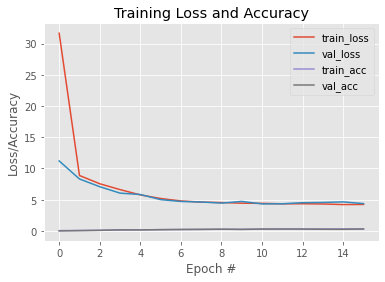

In [ ]:

inputs = Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]))

#Base Model

# primer bloque
x1= Conv2D(32, (3, 3), padding= 'same', activation= 'relu', kernel_regularizer = regularizers.l1(0.01))(inputs)
x1= BatchNormalization()(x1)
x1= Conv2D(32, (3,3), padding= 'same', activation = 'relu', kernel_regularizer = regularizers.l1(0.01))(x1)
x1= BatchNormalization()(x1)
x1= MaxPooling2D(pool_size = (2,2))(x1)
x1 = Dropout(0.25)(x1)

#segundo bloque
x2 = Conv2D(64, (3, 3), padding= 'same', activation = 'relu', kernel_regularizer = regularizers.l1(0.01))(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu", kernel_regularizer = regularizers.l1(0.01))(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

# 3 bloque

x2 = Conv2D(256, (3, 3), padding="same", activation="relu", kernel_regularizer = regularizers.l1(0.01))(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(256, (3, 3), padding="same", activation="relu", kernel_regularizer = regularizers.l1(0.01))(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

#Top model

xfc = Flatten()(x2)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)

# Clasificador softmax
predictions = Dense(100, activation="softmax")(xfc)


model = Model(inputs=inputs, outputs=predictions)

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"]) 

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H_pre = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, callbacks=[early_stopping])

predictions =model.predict(x_test, batch_size=128)

# Sacamos el report para test
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=LabelNames))

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, early_stopping.stopped_epoch +1), H_pre.history["loss"], label="train_loss")
plt.plot(np.arange(0, early_stopping.stopped_epoch +1), H_pre.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, early_stopping.stopped_epoch +1), H_pre.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, early_stopping.stopped_epoch +1), H_pre.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

### 2.2 Weight regularization L2 ---50% acc

In [ ]:
inputs = Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]))

#Base Model

# primer bloque
x1= Conv2D(32, (3, 3), padding= 'same', activation= 'relu', kernel_regularizer = regularizers.l2(0.01))(inputs)
x1= BatchNormalization()(x1)
x1= Conv2D(32, (3,3), padding= 'same', activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(x1)
x1= BatchNormalization()(x1)
x1= MaxPooling2D(pool_size = (2,2))(x1)
x1 = Dropout(0.25)(x1)

#segundo bloque
x2 = Conv2D(64, (3, 3), padding= 'same', activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu", kernel_regularizer = regularizers.l2(0.01))(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

# 3 bloque

x2 = Conv2D(256, (3, 3), padding="same", activation="relu", kernel_regularizer = regularizers.l2(0.01))(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(256, (3, 3), padding="same", activation="relu", kernel_regularizer = regularizers.l2(0.01))(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

#Top model

xfc = Flatten()(x2)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)

# Clasificador softmax
predictions = Dense(100, activation="softmax")(xfc)


model = Model(inputs=inputs, outputs=predictions)

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"]) 

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H_pre = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, callbacks=[early_stopping])

predictions =model.predict(x_test, batch_size=128)

# Sacamos el report para test
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=LabelNames))



[INFO]: Entrenando la red...
Epoch 1/20
313/313 [==============================] - 18s 33ms/step - loss: 7.4091 - accuracy: 0.1185 - val_loss: 5.3294 - val_accuracy: 0.1602
Epoch 2/20
313/313 [==============================] - 9s 30ms/step - loss: 4.4266 - accuracy: 0.2270 - val_loss: 3.8173 - val_accuracy: 0.2723
Epoch 3/20
313/313 [==============================] - 9s 30ms/step - loss: 3.5573 - accuracy: 0.3040 - val_loss: 3.2856 - val_accuracy: 0.3479
Epoch 4/20
313/313 [==============================] - 8s 27ms/step - loss: 3.2420 - accuracy: 0.3501 - val_loss: 3.3628 - val_accuracy: 0.3376
Epoch 5/20
313/313 [==============================] - 8s 27ms/step - loss: 3.0609 - accuracy: 0.3850 - val_loss: 2.9896 - val_accuracy: 0.4038
Epoch 6/20
313/313 [==============================] - 8s 27ms/step - loss: 2.9798 - accuracy: 0.4076 - val_loss: 2.9153 - val_accuracy: 0.4365
Epoch 7/20
313/313 [==============================] - 8s 26ms/step - loss: 2.9230 - accuracy: 0.4297 - val_loss:

### 2.2 Ajuste Dropout a 0.75--35% acc

In [ ]:
inputs = Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]))

#Base Model

# primer bloque
x1= Conv2D(32, (3, 3), padding= 'same', activation= 'relu')(inputs)
x1= BatchNormalization()(x1)
x1= Conv2D(32, (3,3), padding= 'same', activation = 'relu')(x1)
x1= BatchNormalization()(x1)
x1= MaxPooling2D(pool_size = (2,2))(x1)
x1 = Dropout(0.75)(x1)

#segundo bloque
x2 = Conv2D(64, (3, 3), padding= 'same', activation = 'relu')(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.75)(x2)

# 3 bloque

x2 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.75)(x2)

#Top model

xfc = Flatten()(x2)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.75)(xfc)

# Clasificador softmax
predictions = Dense(100, activation="softmax")(xfc)


model = Model(inputs=inputs, outputs=predictions)

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"]) 

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H_pre = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, callbacks=[early_stopping])

predictions =model.predict(x_test, batch_size=128)

# Sacamos el report para test
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=LabelNames))



[INFO]: Entrenando la red...
Epoch 1/20
313/313 [==============================] - 16s 36ms/step - loss: 5.4776 - accuracy: 0.0280 - val_loss: 4.5445 - val_accuracy: 0.0385
Epoch 2/20
313/313 [==============================] - 10s 32ms/step - loss: 4.5161 - accuracy: 0.0575 - val_loss: 4.3162 - val_accuracy: 0.0442
Epoch 3/20
313/313 [==============================] - 10s 32ms/step - loss: 4.1970 - accuracy: 0.0861 - val_loss: 4.0349 - val_accuracy: 0.0833
Epoch 4/20
313/313 [==============================] - 11s 34ms/step - loss: 3.9681 - accuracy: 0.1093 - val_loss: 3.8546 - val_accuracy: 0.1162
Epoch 5/20
313/313 [==============================] - 9s 30ms/step - loss: 3.8004 - accuracy: 0.1314 - val_loss: 3.8265 - val_accuracy: 0.1350
Epoch 6/20
313/313 [==============================] - 9s 30ms/step - loss: 3.6621 - accuracy: 0.1480 - val_loss: 3.5907 - val_accuracy: 0.1552
Epoch 7/20
313/313 [==============================] - 8s 26ms/step - loss: 3.5580 - accuracy: 0.1610 - val_lo

### 2.2.1 Ajuste Droput 0.5-- 54% acc

In [ ]:
inputs = Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]))

#Base Model

# primer bloque
x1= Conv2D(32, (3, 3), padding= 'same', activation= 'relu')(inputs)
x1= BatchNormalization()(x1)
x1= Conv2D(32, (3,3), padding= 'same', activation = 'relu')(x1)
x1= BatchNormalization()(x1)
x1= MaxPooling2D(pool_size = (2,2))(x1)
x1 = Dropout(0.5)(x1)

#segundo bloque
x2 = Conv2D(64, (3, 3), padding= 'same', activation = 'relu')(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.5)(x2)

# 3 bloque

x2 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.5)(x2)

#Top model

xfc = Flatten()(x2)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)

# Clasificador softmax
predictions = Dense(100, activation="softmax")(xfc)


model = Model(inputs=inputs, outputs=predictions)

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"]) 

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H_pre = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, callbacks=[early_stopping])

predictions =model.predict(x_test, batch_size=128)

# Sacamos el report para test
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=LabelNames))




[INFO]: Entrenando la red...
Epoch 1/20
313/313 [==============================] - 14s 31ms/step - loss: 4.3372 - accuracy: 0.0886 - val_loss: 3.8580 - val_accuracy: 0.1366
Epoch 2/20
313/313 [==============================] - 8s 26ms/step - loss: 3.5076 - accuracy: 0.1785 - val_loss: 3.2623 - val_accuracy: 0.2360
Epoch 3/20
313/313 [==============================] - 8s 27ms/step - loss: 3.0933 - accuracy: 0.2441 - val_loss: 3.0194 - val_accuracy: 0.2884
Epoch 4/20
313/313 [==============================] - 8s 27ms/step - loss: 2.7790 - accuracy: 0.3009 - val_loss: 2.6164 - val_accuracy: 0.3424
Epoch 5/20
313/313 [==============================] - 10s 32ms/step - loss: 2.5599 - accuracy: 0.3436 - val_loss: 2.3889 - val_accuracy: 0.3825
Epoch 6/20
313/313 [==============================] - 9s 29ms/step - loss: 2.4149 - accuracy: 0.3728 - val_loss: 2.2187 - val_accuracy: 0.4207
Epoch 7/20
313/313 [==============================] - 9s 30ms/step - loss: 2.3052 - accuracy: 0.3934 - val_loss

### 2.3 Ajuste Kernels 5x5-- 55% acc

In [ ]:
inputs = Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]))

#Base Model

# primer bloque
x1= Conv2D(32, (5, 5), padding= 'same', activation= 'relu')(inputs)
x1= BatchNormalization()(x1)
x1= Conv2D(32, (5,5), padding= 'same', activation = 'relu')(x1)
x1= BatchNormalization()(x1)
x1= MaxPooling2D(pool_size = (2,2))(x1)
x1 = Dropout(0.5)(x1)

#segundo bloque
x2 = Conv2D(64, (5, 5), padding= 'same', activation = 'relu')(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (5, 5), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.5)(x2)

# 3 bloque

x2 = Conv2D(256, (5, 5), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(256, (5, 5), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.5)(x2)

#Top model

xfc = Flatten()(x2)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)

# Clasificador softmax
predictions = Dense(100, activation="softmax")(xfc)


model = Model(inputs=inputs, outputs=predictions)

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"]) 

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H_pre = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, callbacks=[early_stopping])

predictions =model.predict(x_test, batch_size=128)

# Sacamos el report para test
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=LabelNames))



[INFO]: Entrenando la red...
Epoch 1/20
313/313 [==============================] - 22s 45ms/step - loss: 4.4265 - accuracy: 0.0794 - val_loss: 3.8476 - val_accuracy: 0.1494
Epoch 2/20
313/313 [==============================] - 13s 42ms/step - loss: 3.6026 - accuracy: 0.1671 - val_loss: 3.2482 - val_accuracy: 0.2229
Epoch 3/20
313/313 [==============================] - 14s 44ms/step - loss: 3.1437 - accuracy: 0.2382 - val_loss: 2.8252 - val_accuracy: 0.3007
Epoch 4/20
313/313 [==============================] - 13s 41ms/step - loss: 2.8077 - accuracy: 0.2956 - val_loss: 2.4848 - val_accuracy: 0.3627
Epoch 5/20
313/313 [==============================] - 13s 41ms/step - loss: 2.5290 - accuracy: 0.3493 - val_loss: 2.3736 - val_accuracy: 0.3876
Epoch 6/20
313/313 [==============================] - 13s 42ms/step - loss: 2.3428 - accuracy: 0.3867 - val_loss: 2.2218 - val_accuracy: 0.4204
Epoch 7/20
313/313 [==============================] - 13s 42ms/step - loss: 2.1878 - accuracy: 0.4162 - val

#Conclusion

The rework carried out in this notebook consists of the implementation of two different strategies when solving a classification problem by means of neural networks and the deep learning methodology.

The data set that was used to train the neural network is that of CIFAR-100 as requested by the activity statement. And the strategies implemented, as also indicated by the instructions of the activity, were the use of a pre-trained network and training from scratch a network formed by oneself (from scratch).

The data set, as was well mentioned in the explanation of it in the early stages of the project, consists of 100 different classes of 600 images each, of which 500 constitute the training set and the other 100 the validation set (or test).

It is worth clarifying that the metric chosen to evaluate the performance of the models is accuracy, since the problem is one of classification.

Regarding the development of the strategies, the pre-trained network implemented in the first strategy is the 'ResNet50' network (convolutional neural network with 50 layers of depth, trained on more than a million images from the ImageNet database). The model was trained with this network using different number of convolutional blocks. Starting with the complete structure of the network, up to freezing 5 of the 17 convolutional blocks that it comprises. The metrics did not show notable differences, so the use of the simplest of them was stopped, saving computational effort. After having done this analysis and made this decision, adjustments were implemented in the top model part of the algorithm. These adjustments meant positive changes in the metrics of the model but not enough to satisfy the ambitions of the work.

The accuracy returned by the ResNet50 network without changes in the top model is 37% and after modifying the top model it is 39%.

As for the second strategy, the 'from scratch' network, the results are much more satisfactory, with a final accuracy of 55%!

The process carried out in this strategy has been the implementation of blocks formed by the Conv2D, BatchNormalization, MaxPooling2D and Dropout layers with different implementation values in each layer. Initially implementing just a few of them and then continuing to add and change their implementation.